# 단톡방 과제 - 11주차
- 60171100 윤민혁

In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = sns.load_dataset('iris')

In [43]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [44]:
from sklearn.preprocessing import StandardScaler

df_scaled = StandardScaler().fit_transform(df.drop(['species'], axis = 1))
df_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## 적절한 클러스터 갯수 구하기

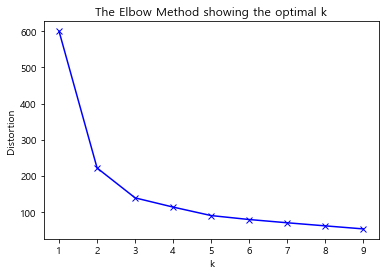

In [45]:
#오차제곱합으로 최적 클러스터 개수 찾기
X = df_scaled
inertia_arr = []#SSE 값을 저장하기 위한 list
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)# 모델 적합
    inertia = kmeanModel.inertia_
    inertia_arr.append(inertia)
    
#Plot the show
plt.plot(K, inertia_arr, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X) # 클러스터 설정 - 갯수를 3개로 셋팅

KMeans(n_clusters=3)

In [47]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [48]:
df['cluster_id'] = kmeans.labels_
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2) # 차원 갯수 설정(그래프 상에 나타내기 위해 2개로)
pca.fit(df_scaled)

df_pca = pca.transform(df_scaled)

print('축소전:',df_scaled.shape)
print('축소후:',df_pca.shape)

축소전: (150, 4)
축소후: (150, 2)


In [50]:
df_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [51]:
cols = ['pc1','pc2']
df_pca = pd.DataFrame(data = df_pca, columns=cols)
df_pca

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [52]:
df_pca['species'] = df.species
df_pca['target'] = df.cluster_id

In [53]:
df_pca

,pc1,pc2,species,target
0,-2.264703,0.480027,setosa,1
1,-2.080961,-0.674134,setosa,1
2,-2.364229,-0.341908,setosa,1
3,-2.299384,-0.597395,setosa,1
4,-2.389842,0.646835,setosa,1
...,...,...,...,...
145,1.870503,0.386966,virginica,0
146,1.564580,-0.896687,virginica,2
147,1.521170,0.269069,virginica,0
148,1.372788,1.011254,virginica,0


Text(0, 0.5, 'pc2')

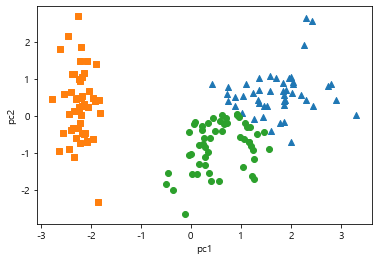

In [54]:
# 세가지 종류의 marker로 그래프 상에 좌표 표시
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_val = df_pca[df_pca['target']== i]['pc1']
    y_val = df_pca[df_pca['target']== i]['pc2']
    plt.scatter(x_val, y_val, marker = marker)

plt.xlabel('pc1')
plt.ylabel('pc2')

In [55]:
df_pca['species_num'] = df_pca.species.map({'setosa':1, 'versicolor':2,'virginica':0})
df_pca

,pc1,pc2,species,target,species_num
0,-2.264703,0.480027,setosa,1,1
1,-2.080961,-0.674134,setosa,1,1
2,-2.364229,-0.341908,setosa,1,1
3,-2.299384,-0.597395,setosa,1,1
4,-2.389842,0.646835,setosa,1,1
...,...,...,...,...,...
145,1.870503,0.386966,virginica,0,0
146,1.564580,-0.896687,virginica,2,0
147,1.521170,0.269069,virginica,0,0
148,1.372788,1.011254,virginica,0,0


In [59]:
a = 0
for i in range(len(df_pca)):
    if df_pca['target'][i] ==df_pca['species_num'][i]:
        a = a+1
print('정확도 :', a/len(df_pca))

정확도 : 0.8333333333333334
